In [1]:
#standard ds imports
import pandas as pd
import numpy as np
#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# .py imports
from env import user, pwd,host
import env
import wrangle_zillow as wz
import wranglerer
import os
#sklearn imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

In [2]:
df = wz.acquire_zillow()

local version found!


In [3]:
df.head()

,logererror,beds,baths,sqft,taxable_value,built,lotsqft,fips,city
0,0.025595,4.0,3.5,3100.0,1023282.0,1998.0,4506.0,6059.0,53571.0
1,0.055619,2.0,1.0,1465.0,464000.0,1967.0,12647.0,6111.0,13091.0
2,0.005383,3.0,2.0,1243.0,564778.0,1962.0,8432.0,6059.0,21412.0
3,-0.103410,4.0,3.0,2376.0,145143.0,1970.0,13038.0,6037.0,396551.0
4,-0.001011,4.0,3.0,2962.0,773303.0,1950.0,63000.0,6037.0,47019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   logererror     52442 non-null  float64
 1   beds           52442 non-null  float64
 2   baths          52442 non-null  float64
 3   sqft           52360 non-null  float64
 4   taxable_value  52441 non-null  float64
 5   built          52326 non-null  float64
 6   lotsqft        52073 non-null  float64
 7   fips           52442 non-null  float64
 8   city           51405 non-null  float64
dtypes: float64(9)
memory usage: 4.0 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
logererror,52442.0,0.018294,0.177502,-4.65542,-0.024639,0.00701,0.040691,5.262999e+00
beds,52442.0,3.300675,0.949086,0.00000,3.000000,3.00000,4.000000,1.400000e+01
baths,52442.0,2.299397,1.022764,0.00000,2.000000,2.00000,3.000000,1.800000e+01
sqft,52360.0,1922.874083,1004.363491,128.00000,1268.000000,1659.00000,2306.000000,2.192900e+04
taxable_value,52441.0,529683.008524,751888.311091,1000.00000,193750.000000,373612.00000,619301.000000,4.906124e+07
built,52326.0,1963.393820,23.133355,1878.00000,1950.000000,1961.00000,1979.000000,2.016000e+03
lotsqft,52073.0,11339.520135,86746.804342,236.00000,5583.000000,6840.00000,8798.000000,6.971010e+06
fips,52442.0,6049.131917,21.028933,6037.00000,6037.000000,6037.00000,6059.000000,6.111000e+03
city,51405.0,33503.090225,49176.135422,3491.00000,12447.000000,24812.00000,40227.000000,3.965560e+05


local version found!


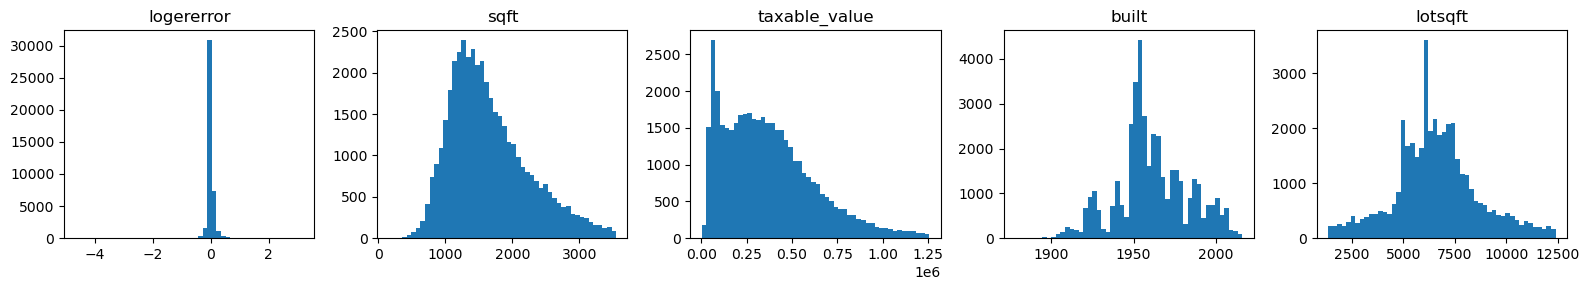

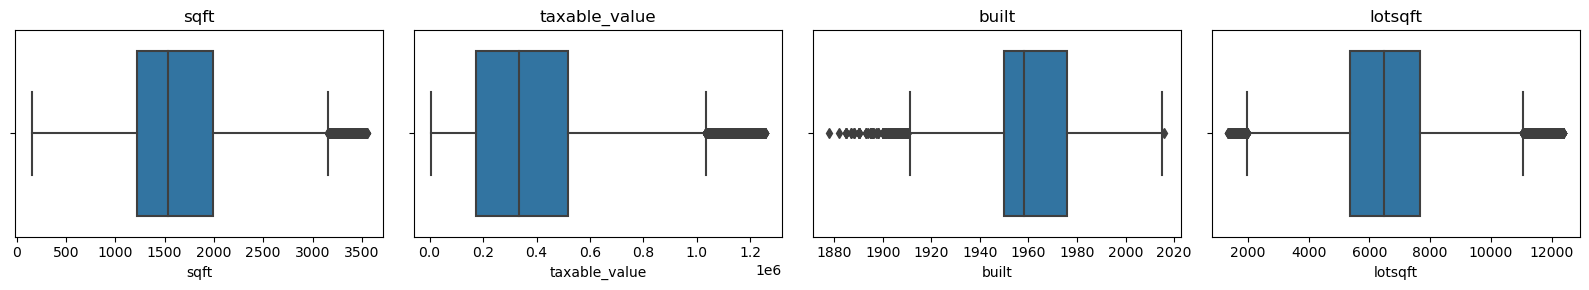

In [6]:
train_all,validate_all,test_all = wz.wrangle_zillow()
train_all['fips'] = train_all.fips.astype(int).astype(object)
train_all['beds'] = train_all.beds.astype(int)

In [7]:
# 3 Write a function that takes in a df and creates a missingness summary.
def nulls_by_col(df):
    '''
    This function takes in a dataframe 
    and finds the number of missing values in each column
    it returns a dataframe with quantity and percent of missing values
    '''
    num_missing = df.isnull().sum()
    percent_miss = num_missing / df.shape[0] * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': percent_miss})
    return cols_missing.sort_values(by='num_rows_missing', ascending=False)

In [8]:
nulls_by_col(train_all)

,num_rows_missing,percent_rows_missing
logererror,0,0.0
beds,0,0.0
baths,0,0.0
sqft,0,0.0
taxable_value,0,0.0
built,0,0.0
lotsqft,0,0.0
fips,0,0.0
city,0,0.0


In [9]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23136 entries, 1847 to 38303
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   logererror     23136 non-null  float64
 1   beds           23136 non-null  int64  
 2   baths          23136 non-null  float64
 3   sqft           23136 non-null  float64
 4   taxable_value  23136 non-null  float64
 5   built          23136 non-null  float64
 6   lotsqft        23136 non-null  float64
 7   fips           23136 non-null  object 
 8   city           23136 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.8+ MB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   logererror     52442 non-null  float64
 1   beds           52442 non-null  float64
 2   baths          52442 non-null  float64
 3   sqft           52360 non-null  float64
 4   taxable_value  52441 non-null  float64
 5   built          52326 non-null  float64
 6   lotsqft        52073 non-null  float64
 7   fips           52442 non-null  float64
 8   city           51405 non-null  float64
dtypes: float64(9)
memory usage: 4.0 MB


In [11]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
city,1037,1.977423
lotsqft,369,0.703634
built,116,0.221197
sqft,82,0.156363
taxable_value,1,0.001907
logererror,0,0.000000
beds,0,0.000000
baths,0,0.000000
fips,0,0.000000


In [12]:
#2 Create a function that will drop rows or columns based on the % missingness

def handle_missing_values(df, prop_required_columns=0.5, prop_required_rows=0.75):
    '''
    This function takes in a dataframe, the percent of columns and rows
    that need to have values/non-nulls
    and returns the dataframe with the desired amount of nulls left.
    '''
    column_threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=column_threshold)
    row_threshold = int(round(prop_required_rows * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=row_threshold)
    return df

In [13]:
handle_missing_values(df,prop_required_columns=0.99,prop_required_rows=0.99)

,logererror,beds,baths,sqft,taxable_value,built,lotsqft,fips
0,0.025595,4.0,3.5,3100.0,1023282.0,1998.0,4506.0,6059.0
1,0.055619,2.0,1.0,1465.0,464000.0,1967.0,12647.0,6111.0
2,0.005383,3.0,2.0,1243.0,564778.0,1962.0,8432.0,6059.0
3,-0.103410,4.0,3.0,2376.0,145143.0,1970.0,13038.0,6037.0
4,-0.001011,4.0,3.0,2962.0,773303.0,1950.0,63000.0,6037.0
...,...,...,...,...,...,...,...,...
52437,0.020615,2.0,2.0,1286.0,354621.0,1940.0,47405.0,6037.0
52438,0.013209,4.0,2.0,1612.0,67205.0,1964.0,12105.0,6111.0
52439,0.037129,3.0,1.0,1032.0,49546.0,1954.0,5074.0,6037.0
52440,0.007204,3.0,2.0,1762.0,522000.0,1955.0,6347.0,6037.0


In [14]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
city,1037,1.977423
lotsqft,369,0.703634
built,116,0.221197
sqft,82,0.156363
taxable_value,1,0.001907
logererror,0,0.000000
beds,0,0.000000
baths,0,0.000000
fips,0,0.000000


### MALL CUSTOMERS

In [15]:
# 1 Acquire Data from customers schema SQL
wranglerer.acquire_df()

local version found!


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
df = wranglerer.acquire_df()

local version found!


In [17]:
# 2 Summarize df
wranglerer.summarize(df)

SUMMARY REPORT


Dataframe head: 
   customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40


Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB
None


Dataframe Description: 
       customer_id         age  annual_income  spending_score
count   200.000000  200.000000     200

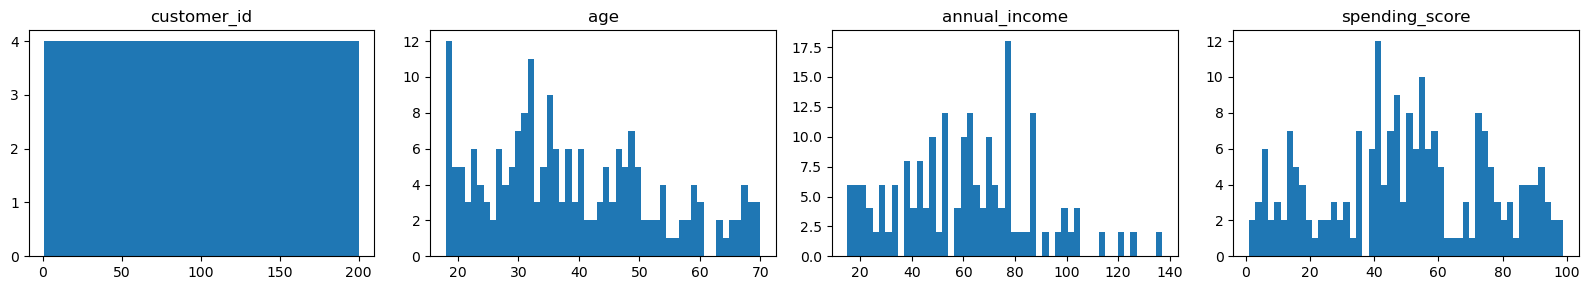

In [18]:
wranglerer.get_hist(df)

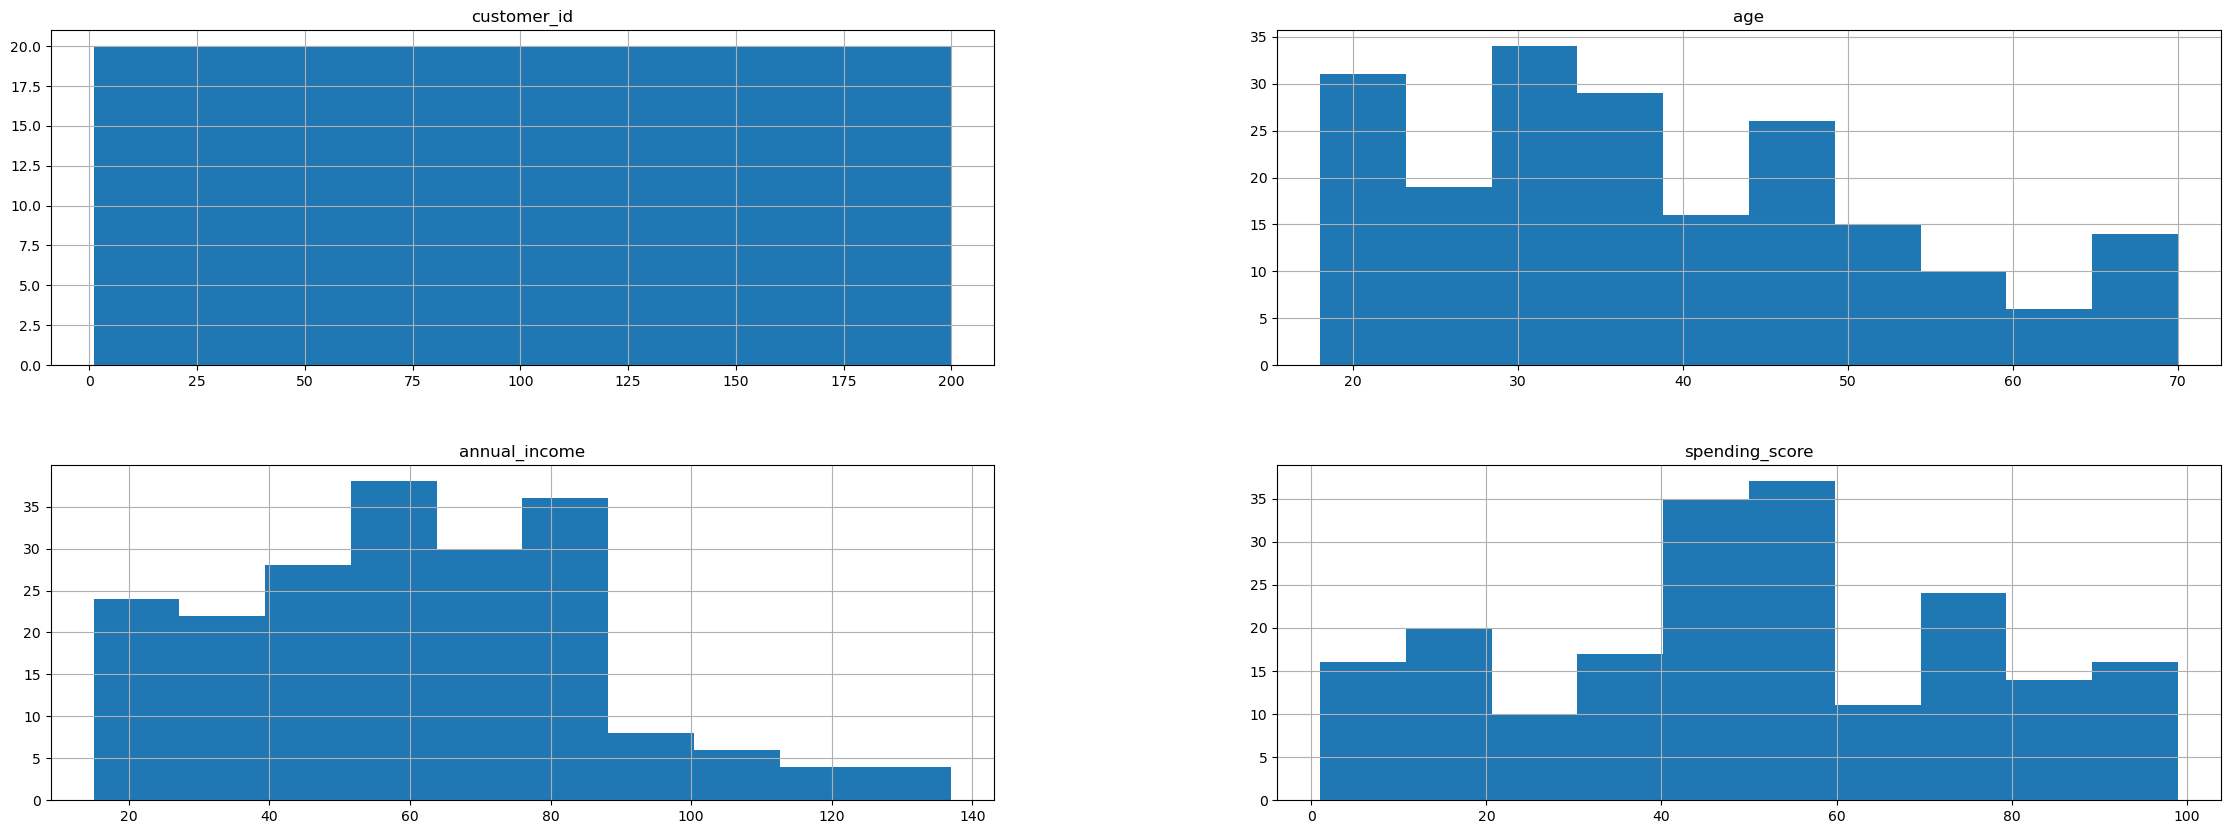

In [19]:
df.hist(figsize=(28, 10))
plt.show()

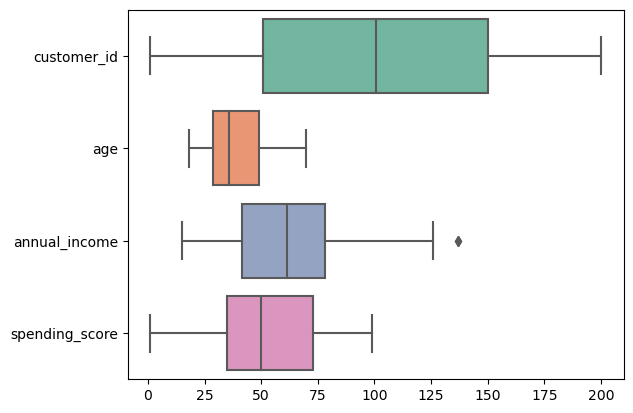

In [20]:
# 3 Visualize outliers
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [21]:
#create a dataframe with the outlier columns
df_outlier = wranglerer.add_upper_outlier_columns(df)
df_outlier

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper
0,1,Male,19,15,39,0,0,0.00,0
1,2,Male,21,15,81,0,0,0.00,0
2,3,Female,20,16,6,0,0,0.00,0
3,4,Female,23,16,77,0,0,0.00,0
4,5,Female,31,17,40,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0,0.00,0
196,197,Female,45,126,28,0,0,0.00,0
197,198,Male,32,126,74,0,0,0.00,0
198,199,Male,32,137,18,0,0,4.25,0


In [22]:
outlier_cols = [col for col in df_outlier.columns if col.endswith('_outliers_upper')]
for col in outlier_cols:
    print(col, ': ')
    subset = df[col][df[col] > 0]
    print(f'Number of Observations Above Upper Bound: {subset.count()}', '\n')
    print(subset.describe())
    print('------', '\n')

customer_id_outliers_upper : 
Number of Observations Above Upper Bound: 0 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: customer_id_outliers_upper, dtype: float64
------ 

age_outliers_upper : 
Number of Observations Above Upper Bound: 0 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age_outliers_upper, dtype: float64
------ 

annual_income_outliers_upper : 
Number of Observations Above Upper Bound: 2 

count    2.00
mean     4.25
std      0.00
min      4.25
25%      4.25
50%      4.25
75%      4.25
max      4.25
Name: annual_income_outliers_upper, dtype: float64
------ 

spending_score_outliers_upper : 
Number of Observations Above Upper Bound: 0 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: spending_score_outliers_upper, dtype: float64
------ 



In [23]:
df.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper
0,1,Male,19,15,39,0,0,0.0,0
1,2,Male,21,15,81,0,0,0.0,0
2,3,Female,20,16,6,0,0,0.0,0
3,4,Female,23,16,77,0,0,0.0,0
4,5,Female,31,17,40,0,0,0.0,0


In [24]:
df[df['annual_income_outliers_upper'] != 0]

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper
198,199,Male,32,137,18,0,0,4.25,0
199,200,Male,30,137,83,0,0,4.25,0


In [25]:
outlier_list = df[df['annual_income_outliers_upper'] != 0].index

In [26]:
df.drop(outlier_list,inplace=True)

In [27]:
df.drop(columns=outlier_cols,inplace=True)

In [28]:
df[197:]

,customer_id,gender,age,annual_income,spending_score
197,198,Male,32,126,74


In [29]:
#4 Split into TVT

# split df into test (20%) and train_validate (80%)
train_validate, test = train_test_split(df, test_size=.2, random_state=123)

# split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [30]:
train.shape,validate.shape,test.shape

((110, 5), (48, 5), (40, 5))

In [31]:
# 5 Encode cat_cols
cat_cols = wranglerer.get_object_cols(train)

In [32]:
cat_cols

['gender']

In [33]:
train = wranglerer.create_dummies(train,train['gender'])

In [34]:
train.head()

,customer_id,gender,age,annual_income,spending_score,Male
45,46,Female,24,39,65,0
39,40,Female,20,37,75,0
11,12,Female,35,19,99,0
171,172,Male,28,87,75,1
95,96,Male,24,60,52,1


In [35]:
train.drop(columns=cat_cols,inplace=True)

In [36]:
train.head()

,customer_id,age,annual_income,spending_score,Male
45,46,24,39,65,0
39,40,20,37,75,0
11,12,35,19,99,0
171,172,28,87,75,1
95,96,24,60,52,1


In [37]:
# 6 Missingness
train = wranglerer.handle_missing_values(train,prop_required_columns=1,prop_required_rows=1)

In [38]:
train

,customer_id,age,annual_income,spending_score,Male
45,46,24,39,65,0
39,40,20,37,75,0
11,12,35,19,99,0
171,172,28,87,75,1
95,96,24,60,52,1
...,...,...,...,...,...
80,81,57,54,51,1
129,130,38,71,75,1
140,141,57,75,5,0
135,136,29,73,88,0


In [39]:
num_cols = wranglerer.get_numeric_X_cols(train,cat_cols)

In [40]:
num_cols

['customer_id', 'age', 'annual_income', 'spending_score', 'Male']

In [41]:
num_cols.remove('customer_id')

In [42]:
num_cols.remove('Male')

In [43]:
num_cols

['age', 'annual_income', 'spending_score']

In [44]:
# 7 Scaling
train_scaled,validate_scaled,test_scaled = wranglerer.min_max_scale(train,validate,test,num_cols)

In [45]:
train_scaled

,age,annual_income,spending_score
45,0.115385,0.216216,0.653061
39,0.038462,0.198198,0.755102
11,0.326923,0.036036,1.000000
171,0.192308,0.648649,0.755102
95,0.115385,0.405405,0.520408
...,...,...,...
80,0.750000,0.351351,0.510204
129,0.384615,0.504505,0.755102
140,0.750000,0.540541,0.040816
135,0.211538,0.522523,0.887755
